In [1]:
from util import build_model, build_dataset

model = build_model("notebook/test_gnn_layer.yaml")

In [2]:
import torch
from torch_geometric.nn import knn_graph

x = torch.randn(10, 4)
pos = torch.randn(10, 3)
edge_index = knn_graph(pos, k=1, batch=None, loop=False)
print(x)

tensor([[ 1.4769,  0.0254,  0.2061,  0.0627],
        [ 1.7987, -0.1146, -1.2711, -0.4380],
        [ 1.9565, -1.2211,  1.0900,  1.9067],
        [-0.0459, -0.3061, -0.0227, -1.2791],
        [ 0.2639, -0.0965,  1.0042,  0.7913],
        [-0.2426,  0.7480, -1.2020,  0.6286],
        [-0.2116,  1.1663, -1.9512,  0.0780],
        [ 0.5046, -0.3714,  1.3628,  0.4528],
        [-1.2952, -0.0308,  0.4230,  0.7094],
        [-0.0551, -0.3454,  0.6457, -0.7107]])


In [3]:
out = model(x,pos, edge_index)
out

tensor([[ 2.4829, -0.8362,  0.0212, -1.9241],
        [ 1.3382, -0.9763, -1.7149, -1.4751],
        [ 1.4961, -1.2545,  0.6462,  2.3398],
        [-0.5063, -0.8854,  2.8819, -1.6630],
        [-0.1965, -0.7899,  1.3907,  0.4714],
        [-0.7031,  0.7146, -1.6457,  1.0617],
        [-0.6720,  0.8090, -2.3949, -0.3486],
        [ 3.1824,  2.3056,  0.9191,  1.5192],
        [-1.7556,  0.5919, -0.0208,  2.3497],
        [-0.5156, -0.2250,  0.2019, -0.1292]], grad_fn=<AddBackward0>)

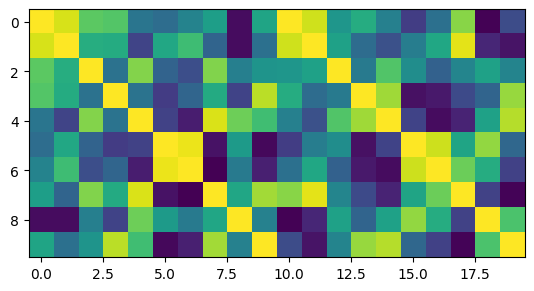

In [4]:
x_np = x.detach().numpy()
out_np = out.detach().numpy()

import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.hstack([np.corrcoef(x_np), np.corrcoef(out_np)]))